# Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB
from sklearn.feature_selection import VarianceThreshold
from sklearn import datasets
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score
# Separação dos Dados entre treino e teste
from sklearn.model_selection import train_test_split

# Análise dos Erros
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

In [103]:
# Importando o dataset
base = datasets.load_digits()

# Dividindo em entrada e saida
X = base.data  
y = base.target

# Accessando os nomes das colunas do banco de dados
feature_names = base.feature_names
target_names = base.target_names

print(base.data )
print(base.target)
print(feature_names)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_

In [104]:
acc_nbGaussianNB = []
acc_nbBernoulliNB = []
acc_nbComplementNB = []

precision_nbGaussianNB = []
precision_nbBernoulliNB = []
precision_nbComplementNB = []

recall_nbGaussianNB = []
recall_nbBernoulliNB = []
recall_nbComplementNB = []

f1_nbGaussianNB = []
f1_nbBernoulliNB = []
f1_nbComplementNB = []

# Estabelecendo o limiar de variancia
limiar_de_variancia = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

for limiar in limiar_de_variancia:
    
    # Criando o modelo de selecao
    selecao = VarianceThreshold(threshold = limiar)
    
    # Selecionando as features
    features_selecionadas = selecao.fit_transform(X)
    # Divisao de dados em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(features_selecionadas, y, test_size = 0.3, 
                                                        random_state = 42)
    # Criando o modelo do classificador
    nb = GaussianNB()
    nb2 = BernoulliNB()
    nb3 = ComplementNB()
    
    # Treinamento
    nb.fit(X_train, y_train)
    nb2.fit(X_train, y_train)
    nb3.fit(X_train, y_train)
    
    # Teste
    y_pred = nb.predict(X_test)
    y_pred2 = nb2.predict(X_test)
    y_pred3 = nb3.predict(X_test)
    
    # Avaliacao das métricas
    acc_nbGaussianNB.append(accuracy_score(y_test,y_pred))
    acc_nbBernoulliNB.append(accuracy_score(y_test,y_pred2))
    acc_nbComplementNB.append(accuracy_score(y_test,y_pred3))
    
    precision_nbGaussianNB.append(precision_score(y_test, y_pred, average='macro'))
    precision_nbBernoulliNB.append(precision_score(y_test, y_pred2, average='macro'))
    precision_nbComplementNB.append(precision_score(y_test, y_pred3, average='macro'))
    
    recall_nbGaussianNB.append(recall_score(y_test, y_pred, average='macro'))
    recall_nbBernoulliNB.append(recall_score(y_test, y_pred2, average='macro'))
    recall_nbComplementNB.append(recall_score(y_test, y_pred3, average='macro'))
    
    f1_nbGaussianNB.append(2 * (precision_nbGaussianNB[-1] * recall_nbGaussianNB[-1]) / (precision_nbGaussianNB[-1] + recall_nbGaussianNB[-1]))
    f1_nbBernoulliNB.append(2 * (precision_nbBernoulliNB[-1] * recall_nbBernoulliNB[-1]) / (precision_nbBernoulliNB[-1] + recall_nbBernoulliNB[-1]))
    f1_nbComplementNB.append(2 * (precision_nbComplementNB[-1] * recall_nbComplementNB[-1]) / (precision_nbComplementNB[-1] + recall_nbComplementNB[-1]))

### Acurácia

In [105]:
print("acc_nbGaussianNB")
for i in range(len(acc_nbGaussianNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(acc_nbGaussianNB[i],2)*100)
print("\n")  
print("acc_nbBernoulliNB")
for i in range(len(acc_nbBernoulliNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(acc_nbBernoulliNB[i],2)*100)
print("\n")  
print("acc_nbComplementNB")
for i in range(len(acc_nbComplementNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(acc_nbComplementNB[i],2)*100)

acc_nbGaussianNB
k: 0.1 Acurácia: 88.0
k: 0.2 Acurácia: 87.0
k: 0.3 Acurácia: 87.0
k: 0.4 Acurácia: 87.0
k: 0.5 Acurácia: 87.0
k: 0.6 Acurácia: 87.0
k: 0.7 Acurácia: 86.0
k: 0.8 Acurácia: 86.0
k: 0.9 Acurácia: 89.0
k: 1 Acurácia: 89.0


acc_nbBernoulliNB
k: 0.1 Acurácia: 86.0
k: 0.2 Acurácia: 86.0
k: 0.3 Acurácia: 86.0
k: 0.4 Acurácia: 86.0
k: 0.5 Acurácia: 86.0
k: 0.6 Acurácia: 86.0
k: 0.7 Acurácia: 86.0
k: 0.8 Acurácia: 86.0
k: 0.9 Acurácia: 86.0
k: 1 Acurácia: 86.0


acc_nbComplementNB
k: 0.1 Acurácia: 82.0
k: 0.2 Acurácia: 82.0
k: 0.3 Acurácia: 82.0
k: 0.4 Acurácia: 82.0
k: 0.5 Acurácia: 82.0
k: 0.6 Acurácia: 82.0
k: 0.7 Acurácia: 82.0
k: 0.8 Acurácia: 82.0
k: 0.9 Acurácia: 82.0
k: 1 Acurácia: 82.0


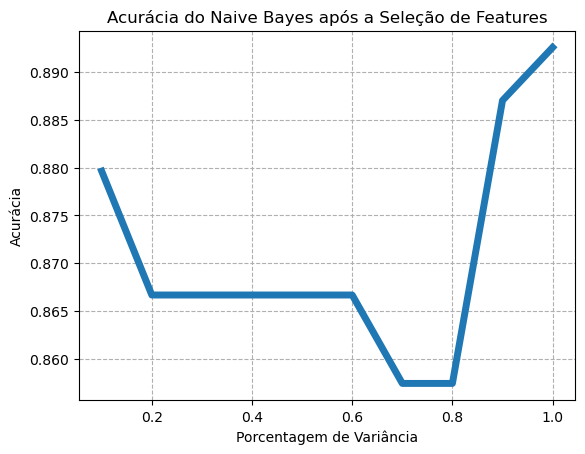

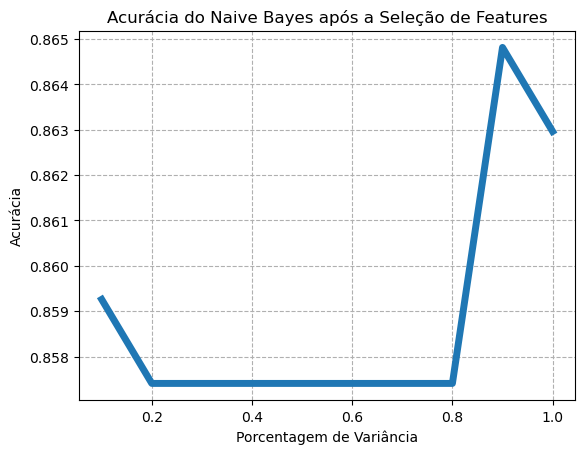

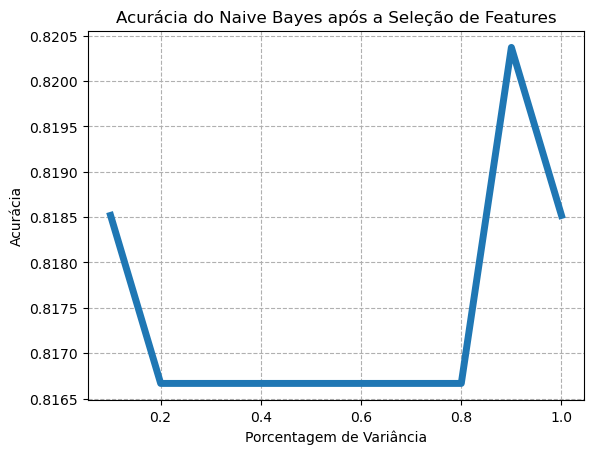

In [106]:
# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, acc_nbGaussianNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, acc_nbBernoulliNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, acc_nbComplementNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

### Precisão

In [107]:
print("precision_nbGaussianNB")
for i in range(len(precision_nbGaussianNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(precision_nbGaussianNB[i],2)*100)
print("\n")  
print("precision_nbBernoulliNB")
for i in range(len(precision_nbBernoulliNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(precision_nbBernoulliNB[i],2)*100)
print("\n")  
print("precision_nbComplementNB")
for i in range(len(precision_nbComplementNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(precision_nbComplementNB[i],2)*100)

precision_nbGaussianNB
k: 0.1 Acurácia: 89.0
k: 0.2 Acurácia: 87.0
k: 0.3 Acurácia: 87.0
k: 0.4 Acurácia: 87.0
k: 0.5 Acurácia: 87.0
k: 0.6 Acurácia: 87.0
k: 0.7 Acurácia: 86.0
k: 0.8 Acurácia: 86.0
k: 0.9 Acurácia: 90.0
k: 1 Acurácia: 90.0


precision_nbBernoulliNB
k: 0.1 Acurácia: 86.0
k: 0.2 Acurácia: 86.0
k: 0.3 Acurácia: 86.0
k: 0.4 Acurácia: 86.0
k: 0.5 Acurácia: 86.0
k: 0.6 Acurácia: 86.0
k: 0.7 Acurácia: 86.0
k: 0.8 Acurácia: 86.0
k: 0.9 Acurácia: 87.0
k: 1 Acurácia: 86.0


precision_nbComplementNB
k: 0.1 Acurácia: 84.0
k: 0.2 Acurácia: 84.0
k: 0.3 Acurácia: 84.0
k: 0.4 Acurácia: 84.0
k: 0.5 Acurácia: 84.0
k: 0.6 Acurácia: 84.0
k: 0.7 Acurácia: 84.0
k: 0.8 Acurácia: 84.0
k: 0.9 Acurácia: 84.0
k: 1 Acurácia: 84.0


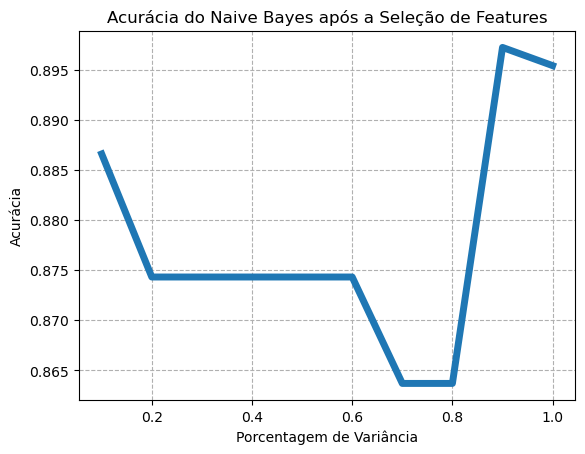

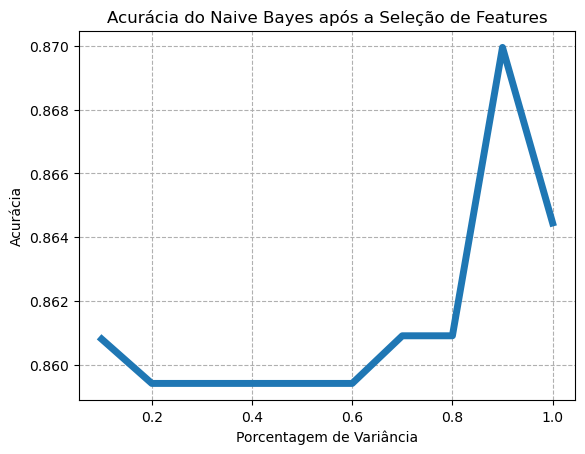

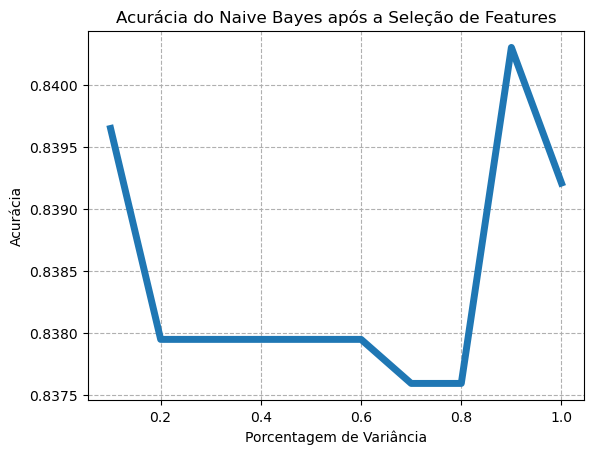

In [108]:
# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, precision_nbGaussianNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, precision_nbBernoulliNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, precision_nbComplementNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

### Recall

In [109]:
print("recall_nbGaussianNB")
for i in range(len(recall_nbGaussianNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(recall_nbGaussianNB[i],2)*100)
print("\n")  
print("recall_nbBernoulliNB")
for i in range(len(recall_nbBernoulliNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(recall_nbBernoulliNB[i],2)*100)
print("\n")  
print("recall_nbComplementNB")
for i in range(len(recall_nbComplementNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(recall_nbComplementNB[i],2)*100)

recall_nbGaussianNB
k: 0.1 Acurácia: 88.0
k: 0.2 Acurácia: 87.0
k: 0.3 Acurácia: 87.0
k: 0.4 Acurácia: 87.0
k: 0.5 Acurácia: 87.0
k: 0.6 Acurácia: 87.0
k: 0.7 Acurácia: 85.0
k: 0.8 Acurácia: 85.0
k: 0.9 Acurácia: 88.0
k: 1 Acurácia: 89.0


recall_nbBernoulliNB
k: 0.1 Acurácia: 86.0
k: 0.2 Acurácia: 86.0
k: 0.3 Acurácia: 86.0
k: 0.4 Acurácia: 86.0
k: 0.5 Acurácia: 86.0
k: 0.6 Acurácia: 86.0
k: 0.7 Acurácia: 86.0
k: 0.8 Acurácia: 86.0
k: 0.9 Acurácia: 87.0
k: 1 Acurácia: 86.0


recall_nbComplementNB
k: 0.1 Acurácia: 81.0
k: 0.2 Acurácia: 81.0
k: 0.3 Acurácia: 81.0
k: 0.4 Acurácia: 81.0
k: 0.5 Acurácia: 81.0
k: 0.6 Acurácia: 81.0
k: 0.7 Acurácia: 81.0
k: 0.8 Acurácia: 81.0
k: 0.9 Acurácia: 81.0
k: 1 Acurácia: 81.0


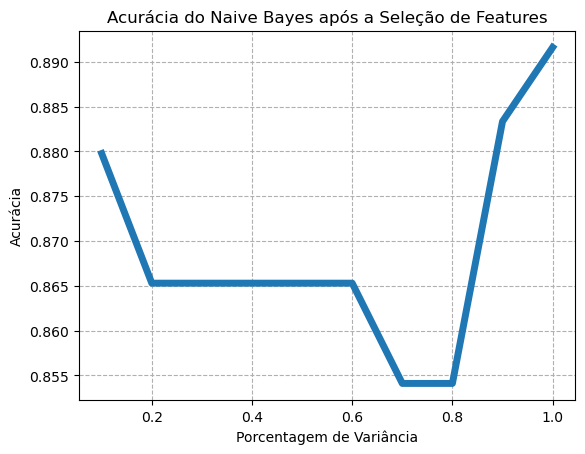

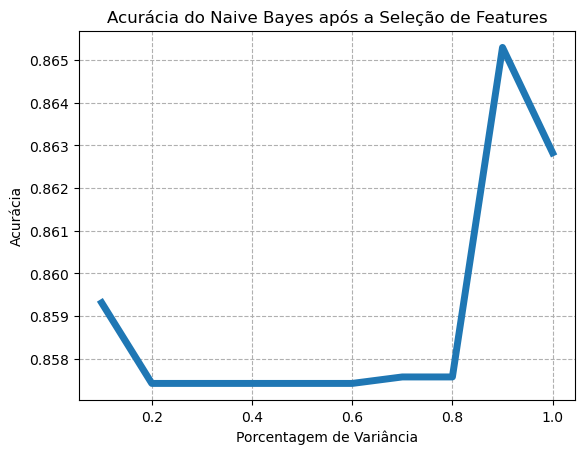

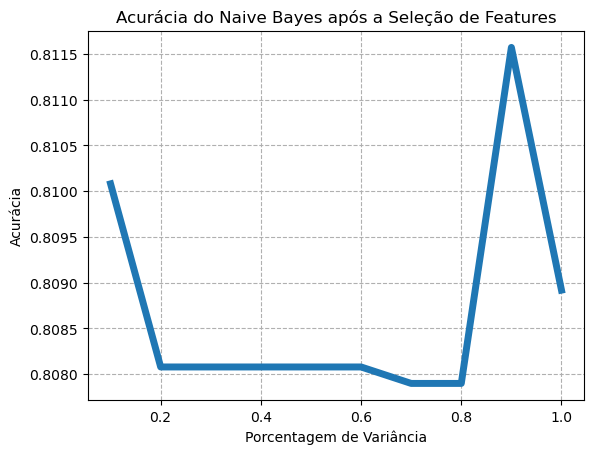

In [110]:
# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, recall_nbGaussianNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, recall_nbBernoulliNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, recall_nbComplementNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

### F1-score

In [111]:
print("f1_nbGaussianNB")
for i in range(len(f1_nbGaussianNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(f1_nbGaussianNB[i],2)*100)
print("\n")  
print("f1_nbBernoulliNB")
for i in range(len(f1_nbBernoulliNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(f1_nbBernoulliNB[i],2)*100)
print("\n")  
print("f1_nbComplementNB")
for i in range(len(f1_nbComplementNB)):
    print("k:", limiar_de_variancia[i],  "Acurácia:", round(f1_nbComplementNB[i],2)*100)

f1_nbGaussianNB
k: 0.1 Acurácia: 88.0
k: 0.2 Acurácia: 87.0
k: 0.3 Acurácia: 87.0
k: 0.4 Acurácia: 87.0
k: 0.5 Acurácia: 87.0
k: 0.6 Acurácia: 87.0
k: 0.7 Acurácia: 86.0
k: 0.8 Acurácia: 86.0
k: 0.9 Acurácia: 89.0
k: 1 Acurácia: 89.0


f1_nbBernoulliNB
k: 0.1 Acurácia: 86.0
k: 0.2 Acurácia: 86.0
k: 0.3 Acurácia: 86.0
k: 0.4 Acurácia: 86.0
k: 0.5 Acurácia: 86.0
k: 0.6 Acurácia: 86.0
k: 0.7 Acurácia: 86.0
k: 0.8 Acurácia: 86.0
k: 0.9 Acurácia: 87.0
k: 1 Acurácia: 86.0


f1_nbComplementNB
k: 0.1 Acurácia: 82.0
k: 0.2 Acurácia: 82.0
k: 0.3 Acurácia: 82.0
k: 0.4 Acurácia: 82.0
k: 0.5 Acurácia: 82.0
k: 0.6 Acurácia: 82.0
k: 0.7 Acurácia: 82.0
k: 0.8 Acurácia: 82.0
k: 0.9 Acurácia: 83.0
k: 1 Acurácia: 82.0


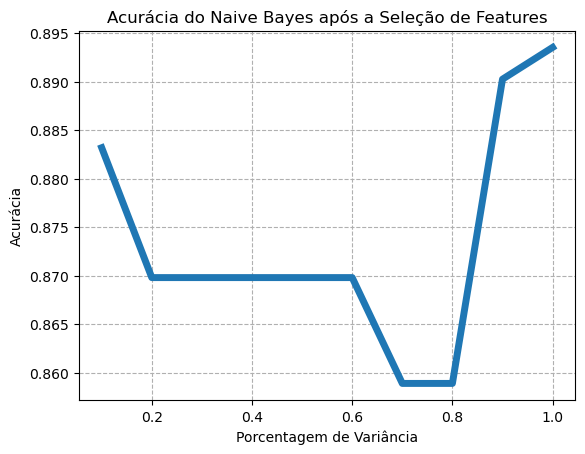

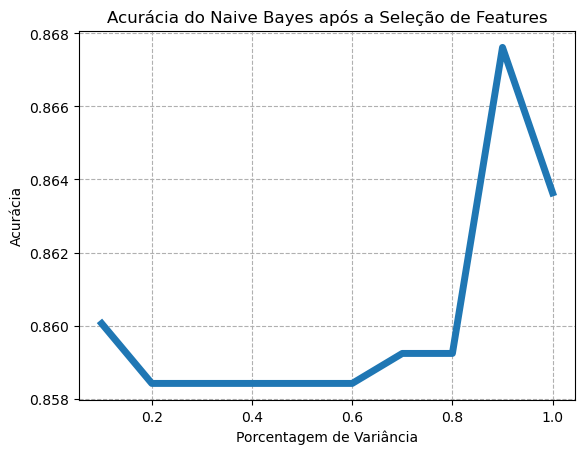

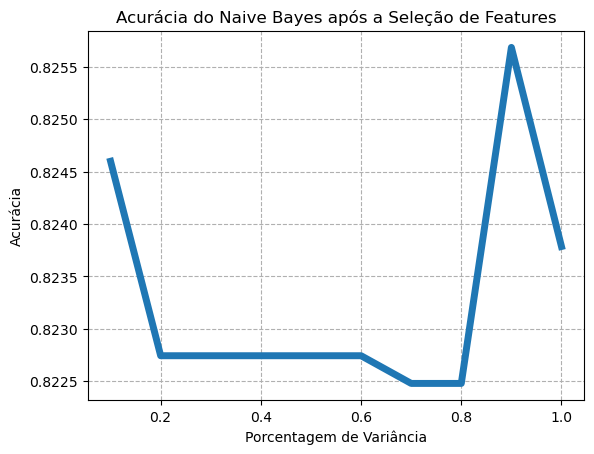

In [112]:
# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, f1_nbGaussianNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, f1_nbBernoulliNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

# Plotando o reultado comparativo
fig, ax = plt.subplots()
plt.plot(limiar_de_variancia, f1_nbComplementNB, linewidth = 5.0)
ax.set_xlabel('Porcentagem de Variância')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia do Naive Bayes após a Seleção de Features')
ax.grid(linestyle = "dashed")
plt.show()

### Foi utilizado do os seguintes modelos do algoritmo Naive Bayes.
- GaussianNB
- BernoulliNB
- ComplementNB